In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape[0]
# x_test.shape

50000

[6]


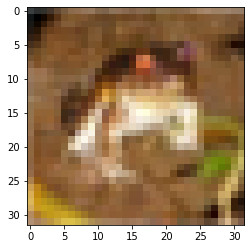

[9]


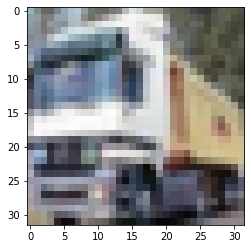

[9]


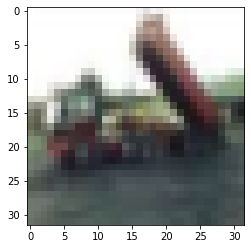

[4]


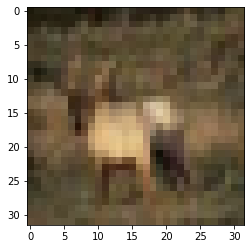

[1]


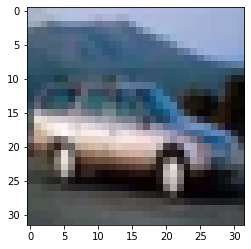

[1]


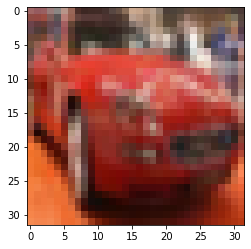

[2]


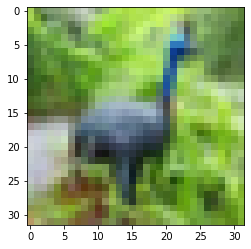

[7]


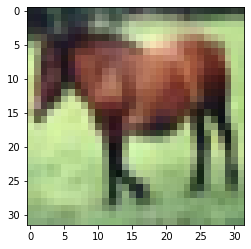

[8]


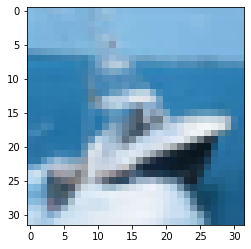

[3]


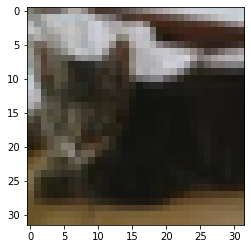

In [4]:
#viewing some data
for i in range(10):
  image_index = i
  print(y_train[image_index])
  plt.imshow(x_train[image_index], cmap='Greys')
  plt.show()

In [6]:
img_rows = 32
img_cols = 32
batch_size = 512
img_shape = (img_rows, img_cols, 3)

# x_train = x_train.reshape(x_train.shape[0], img_cols, img_rows, 1)
# x_test = x_test.reshape(x_test.shape[0], img_cols, img_rows, 1)


print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print(img_shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
(32, 32, 3)


In [117]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_rows,img_cols,3)))    
model.add(Conv2D(32, (3, 3), activation='relu'))    
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

    
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
    
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(10, activation='softmax'))   

In [121]:
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
      optimizer=Adam(lr=0.0001),
      metrics=['accuracy'])



In [123]:
#fitting the model
batch_size = 512
epochs = 80

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,validation_data=(x_test,y_test),
          verbose=1)

Epoch 1/80
98/98 [==============================] - 4s 37ms/step - loss: 1.8293 - accuracy: 0.3191 - val_loss: 1.6406 - val_accuracy: 0.4105
Epoch 2/80
98/98 [==============================] - 4s 37ms/step - loss: 1.7598 - accuracy: 0.3454 - val_loss: 1.5941 - val_accuracy: 0.4285
Epoch 3/80
98/98 [==============================] - 4s 37ms/step - loss: 1.7108 - accuracy: 0.3697 - val_loss: 1.5335 - val_accuracy: 0.4449
Epoch 4/80
98/98 [==============================] - 4s 37ms/step - loss: 1.6561 - accuracy: 0.3925 - val_loss: 1.4917 - val_accuracy: 0.4661
Epoch 5/80
98/98 [==============================] - 4s 37ms/step - loss: 1.6167 - accuracy: 0.4063 - val_loss: 1.4549 - val_accuracy: 0.4724
Epoch 6/80
98/98 [==============================] - 4s 37ms/step - loss: 1.5718 - accuracy: 0.4250 - val_loss: 1.4408 - val_accuracy: 0.4798
Epoch 7/80
98/98 [==============================] - 4s 37ms/step - loss: 1.5313 - accuracy: 0.4387 - val_loss: 1.3939 - val_accuracy: 0.5007
Epoch 8/80
98

In [131]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6711 - accuracy: 0.7739


[0.6710605025291443, 0.7738999724388123]

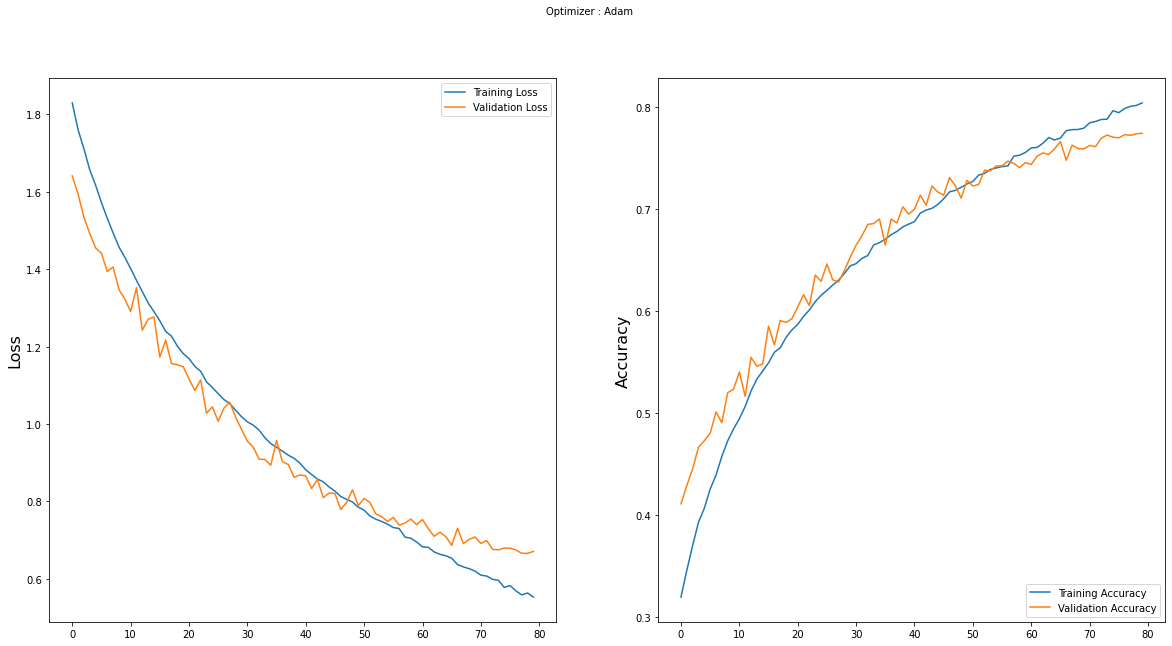

In [133]:
# plot the evolution of Loss and Accuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [136]:
predictions = model.predict(
      x=x_test
    , batch_size=10
    , verbose=0
)



In [ ]:
for i in predictions:
    print(i)

In [140]:
labels_pred = np.argmax(predictions,axis=1)
print(labels_pred)



[3 8 8 ... 5 0 7]


In [145]:
correct = (labels_pred == y_test)
print(correct)


[[ True False False ... False False False]
 [False  True  True ... False False False]
 [False  True  True ... False False False]
 ...
 [False False False ...  True False False]
 [False False False ... False False False]
 [False False False ... False False  True]]


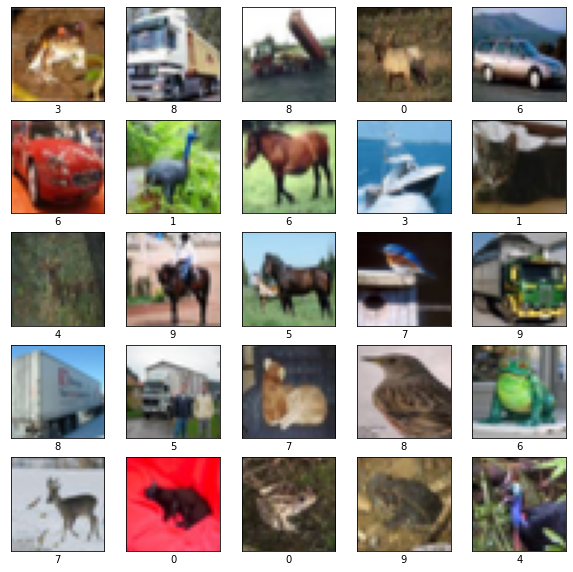

In [160]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(labels_pred[i])
plt.show()


In [170]:

print(y_test[0:25])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]
 [7]
 [0]
 [4]
 [9]
 [5]]
